# TMDB Movies Analysis

## Investigation Overview

In this investigation, I wanted to look at the characteristics that make a movie successful. I will try to answer the following questions: 

1- Do higher budget movies have higher revenues?

2- How different movie budgets are throughout the years and Is there a relationship between the movie's release year and its budget?

3- What are the relationships between the variables of TMDB movies dataset?

## Dataset Overview

The data consisted of 10866 movies and 12 movies attributes such as: popularity, budget, revenue, runtime and so on. 
I got the data from Kaggle.com and it is called: TMDB Movies


In [3]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
#reading the wrangled TMDB's movies dataset
tmdb_movies = pd.read_csv('tmdb_Movies_master.csv')

## Movies Characteristics Exploration

I will start by distributing the  release_year to see how many movies were released per year, to see what the mean revenue and mean budget look like across the years

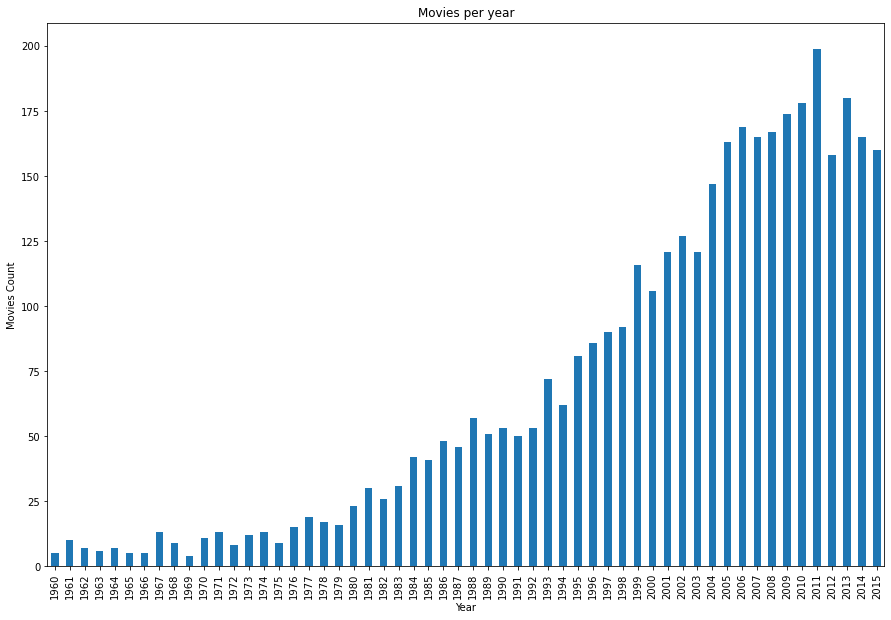

In [8]:
#plot release_year
tmdb_movies['release_year'].value_counts().sort_index().plot.bar(figsize=(15,10));
plt.ylabel('Movies Count');
plt.xlabel('Year');
plt.title('Movies per year');

As shown from the graph, the movie entries range from 1960 to 2015 and the number of movies have definitly increased as the years go by

Now I will visualize the movies mean budget over the years

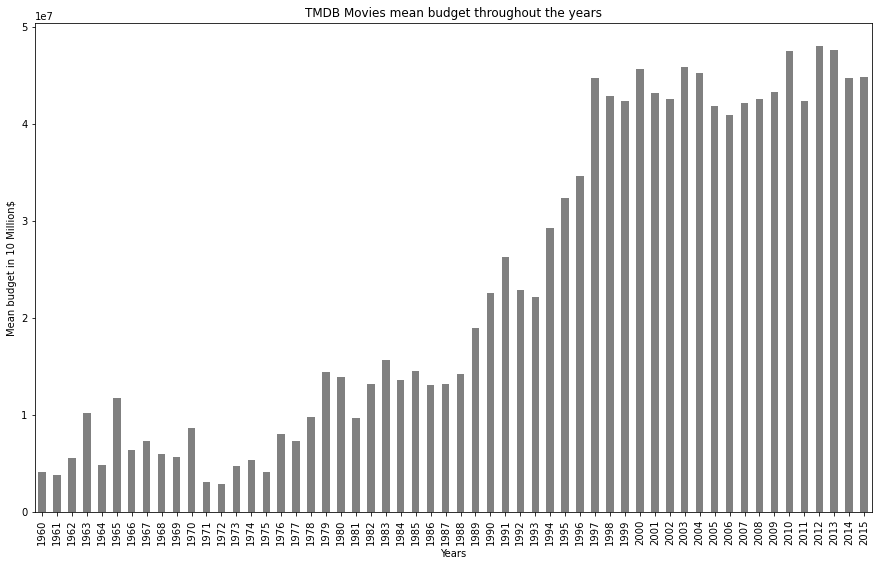

In [11]:
#find the mean budget per year of movies grouped by their release year
mean_budget_by_years = tmdb_movies.groupby('release_year').budget.mean()
mean_budget_by_years.head()
#plot mean budget per release year 
mean_budget_by_years.plot.bar(x=0, y=1,figsize=(15,9), color='grey');
plt.title('TMDB Movies mean budget throughout the years');
plt.xlabel('Years');
plt.ylabel('Mean budget in 10 Million$');
plt.show()

From the graph above which is skewed to the left I think it's clear that the mean budget of the movies is increasing in general as the years go by then it started to go down again. the mean budget seems to be at it's lowest in 1972 and 1971, and at it's highest at 2012 and 2013

Now I will visualize the movies mean revenue over the years

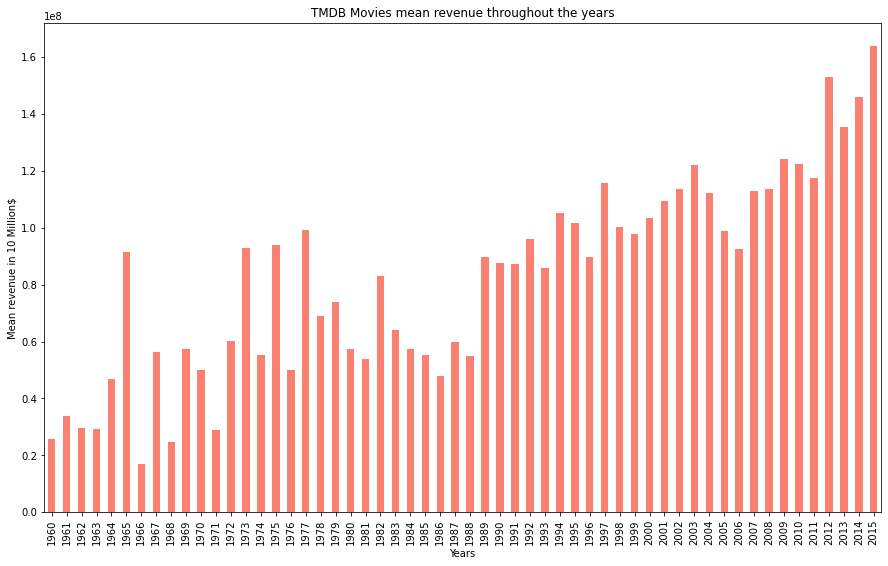

In [13]:
#find the mean revenue per year of movies grouped by their release year
mean_revenue_by_years = tmdb_movies.groupby('release_year').revenue.mean()
mean_revenue_by_years.head()
#plot mean revenue per release year 
mean_revenue_by_years.plot.bar(x=0, y=1,figsize=(15,9), color='salmon');
plt.title('TMDB Movies mean revenue throughout the years');
plt.xlabel('Years');
plt.ylabel('Mean revenue in 10 Million$');
plt.show()

From the graph above which is slightly skewed to the left, the movies revenue by the years is similar to the budget's plot, the mean revenue seems to be at it's lowest in 1966, and at it's highest at 2015 and 2012

## 1- Do higher budget movies have higher revenues?

To answer this I will visualize the highest budget movies and their corresponding revenue

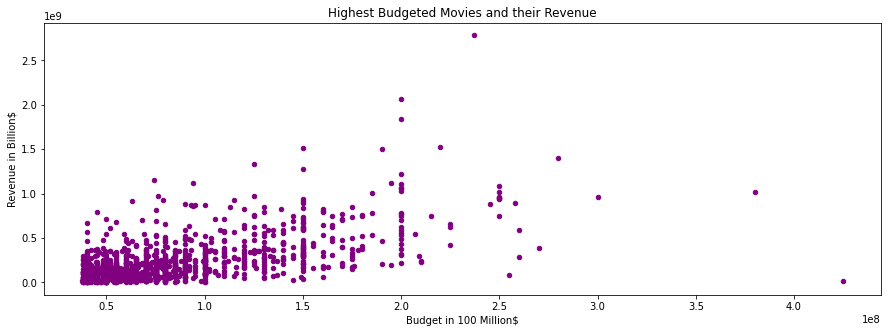

In [16]:
#find the means of budget and revenue
mean_budget = tmdb_movies.budget.mean()
mean_revenue = tmdb_movies.revenue.mean()
#query movies with budget more than the mean budget
high_budget_movies = tmdb_movies.query('budget > {}'.format(mean_budget))
high_budget_movies.describe()
# Create a scatter plot for the highest budgeted movies
high_budget_movies.plot.scatter(x='budget',y='revenue',figsize=(15,5), color='purple') 
plt.title('Highest Budgeted Movies and their Revenue')
plt.xlabel('Budget in 100 Million$')
plt.ylabel('Revenue in Billion$')
plt.show() 

from the scatter plot above there seems to be a relationship between the highest budget movies and their respective revenue but it is not specific. most of the budget falls between the range of 50 million to 200 millions and most of it's corresponding revenue values falls between less than 500 million up to 1 billion dollars

Visualizing highest revene movies and their corresponding budget

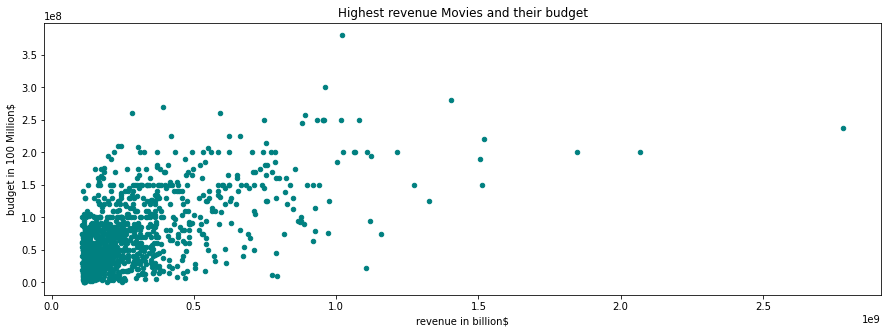

In [19]:
#query movies with revenue more than the mean revenue
high_revenue_movies = tmdb_movies.query('revenue > {}'.format(mean_revenue))
high_revenue_movies.describe()
# Create a scatter plot for the highest revenue movies
high_revenue_movies.plot.scatter(x='revenue',y='budget',figsize=(15,5),color='teal') 
plt.title('Highest revenue Movies and their budget')
plt.xlabel('revenue in billion$')
plt.ylabel('budget in 100 Million$')
plt.show()

From the scatter plot above I can say that the relationship between the revenue and budget of the highest revenue movies seems less defined than the relationship between highest budgeted movies and their corrisponding budget, since it is more spread out

## 2- How different movie budgets are throughout the years and Is there a relationship between the movie's release year and its budget?

The first part of the question has been answered with the mean budget over the years plot, which it showed that the mean of movies budget is definitely increasing througout the years

To answer the second half I will investigate the relationship through the following correlation heatmap and line plot

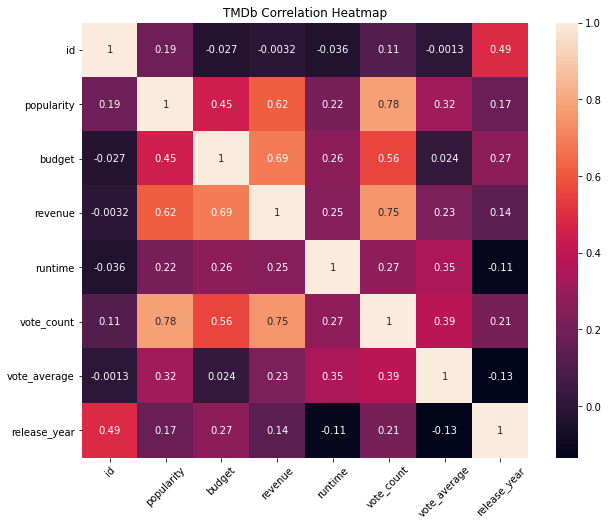

In [21]:
#create a heatmap for tmdb movies
plt.figure(figsize=(10,8))
sb.heatmap(tmdb_movies.corr(), annot=True, cmap='rocket')
plt.title('TMDb Correlation Heatmap')
plt.xticks(rotation=45);

From the correlation heatmap I can answer the second half of the question: No there is not relationship between the movies release year and its budget

## 3- What are the relationships between the variables of TMDB movies dataset?

Acoording to the correlation heatmap above, I observed the following:

There is indeed a strong realtionship between the budget and revenue as expected, yet interestingly there also seems to be a strong relationship between revenue and vote count

There is hardly any relationship between runtime and any other variable, same goes for release_year and unexpectedly vote_average

So I will explore the relationship of the following variables based on the heatmap: popularity, budget, revenue and vote_count across the release years


 I will create a line plot to further demonstrate the relationship between the correlated variables

In [22]:
#find the mean popularity per year of movies grouped by their release year
mean_popularity_by_years = tmdb_movies.groupby('release_year').popularity.mean()
mean_popularity_by_years.head()

release_year
1960    1.324513
1961    0.787718
1962    0.983485
1963    1.040612
1964    1.377790
Name: popularity, dtype: float64

In [24]:
#find the mean vote count per year of movies grouped by their release year
mean_votecount_by_years = tmdb_movies.groupby('release_year').vote_count.mean()
mean_votecount_by_years.head()

release_year
1960    372.600000
1961    191.400000
1962    229.428571
1963    262.333333
1964    343.428571
Name: vote_count, dtype: float64

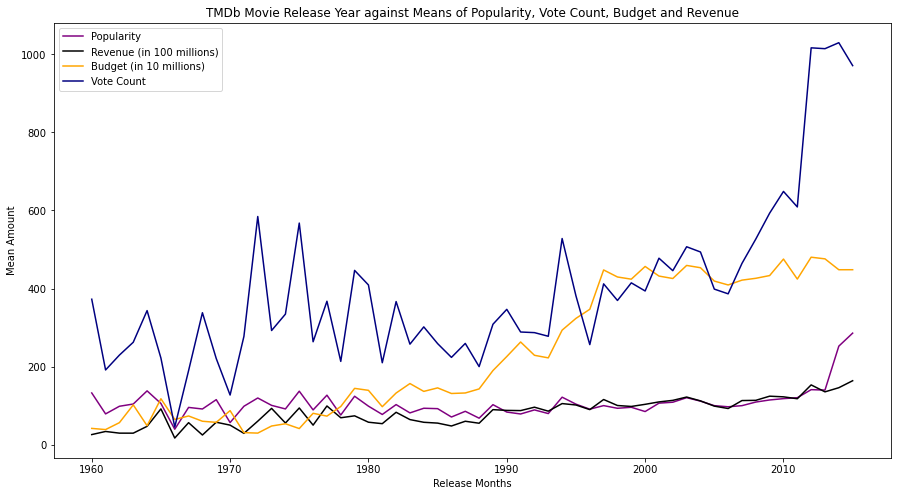

In [25]:
#creating line plot scaling all variables to be in the range of hundreds
plt.figure(figsize=(15,8))
plt.plot(mean_popularity_by_years.index, mean_popularity_by_years.values*100, label='Popularity', color='purple')
plt.plot(mean_revenue_by_years.index, mean_revenue_by_years.values/1000000, label='Revenue (in 100 millions)', color='black')
plt.plot(mean_budget_by_years.index, mean_budget_by_years.values/100000, label='Budget (in 10 millions)', color='orange')
plt.plot(mean_votecount_by_years.index, mean_votecount_by_years.values, label='Vote Count', color='navy')
plt.title('TMDb Movie Release Year against Means of Popularity, Vote Count, Budget and Revenue')
plt.xlabel('Release Months')
plt.ylabel('Mean Amount')
plt.legend()
plt.show();

From the previous line plot, which is skewed to the left, it shows that in general all variables tend to increase throughout the years except for the budget. it also shows that popularity and revenue's lines are quite similar trend-wise, to summarize the answer to the third question, the overall trend of the data seems to be increasing over the years except for the vote count and budget which started to decrease after the 2010s

In [ ]:
jupyter nbconvert Movies_Analysis_Part2.ipynb --to slides --post serve --template output-toggle.tpl